**Data Cleaning**

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
import pickle
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [39]:
df=pd.read_excel("quantity_wise.xlsx")

In [40]:
df['Item'] = pd.to_datetime(df['Item'], format='%Y')
df['Item']=df['Item'].dt.year
df.set_index('Item', inplace=True)

In [41]:
df.columns

Index(['Frozen_Fish', 'Dried_Item', 'Live_Item', 'Chilled_Item', 'Others',
       'Frozen_Shrimp', 'Frozen_Cuttle_Fish', 'Frozen_Squid'],
      dtype='object')

In [42]:
def plot_series(historical_data, forecast_data):
    plt.figure(figsize=(12, 8))

    plt.subplot(2, 4, 1)
    plt.plot(historical_data.index, historical_data['Frozen_Fish_Inv'], label='Historical ', color='blue')
    plt.plot(forecast_data.index, forecast_data['Frozen_Fish_Inv'], label='Forecast ', linestyle='--', color='red')
    plt.title('Frozen Fish')

    plt.subplot(2, 4, 2)
    plt.plot(historical_data.index, historical_data['Dried_Item_Inv'], label='Historical ', color='blue')
    plt.plot(forecast_data.index, forecast_data['Dried_Item_Inv'], label='Forecast ', linestyle='--', color='red')
    plt.title('Dried Item')

    plt.subplot(2, 4, 3)
    plt.plot(historical_data.index, historical_data['Live_Item_Inv'], label='Historical ', color='blue')
    plt.plot(forecast_data.index, forecast_data['Live_Item_Inv'], label='Forecast ', linestyle='--', color='red')
    plt.title('Live Item')

    plt.subplot(2, 4, 4)
    plt.plot(historical_data.index, historical_data['Chilled_Item_Inv'], label='Historical ', color='blue')
    plt.plot(forecast_data.index, forecast_data['Chilled_Item_Inv'], label='Forecast ', linestyle='--', color='red')
    plt.title('Chilled Item')

    plt.subplot(2, 4, 5)
    plt.plot(historical_data.index, historical_data['Others_Inv'], label='Historical ', color='blue')
    plt.plot(forecast_data.index, forecast_data['Others_Inv'], label='Forecast ', linestyle='--', color='red')
    plt.title('Others')

    plt.subplot(2, 4, 6)
    plt.plot(historical_data.index, historical_data['Frozen_Shrimp_Inv'], label='Historical ', color='blue')
    plt.plot(forecast_data.index, forecast_data['Frozen_Shrimp_Inv'], label='Forecast ', linestyle='--', color='red')
    plt.title('Frozen_Shrimp')

    plt.subplot(2, 4, 7)
    plt.plot(historical_data.index, historical_data['Frozen_Cuttle_Fish_Inv'], label='Historical ', color='blue')
    plt.plot(forecast_data.index, forecast_data['Frozen_Cuttle_Fish_Inv'], label='Forecast ', linestyle='--', color='red')
    plt.title('Frozen_Cuttle_Fish')

    plt.subplot(2, 4, 8)
    plt.plot(historical_data.index, historical_data['Frozen_Squid_Inv'], label='Historical ', color='blue')
    plt.plot(forecast_data.index, forecast_data['Frozen_Squid_Inv'], label='Forecast ', linestyle='--', color='red')
    plt.title('Frozen_Squid')

    plt.tight_layout()
    plt.show()


In [43]:
df['Frozen_Fish_Inv']=1/df['Frozen_Fish']
df['Dried_Item_Inv']=1/df['Dried_Item']
df['Live_Item_Inv']=1/df['Live_Item']
df['Chilled_Item_Inv']=1/df['Chilled_Item']
df['Others_Inv']=1/df['Others']
df['Frozen_Shrimp_Inv']=1/df['Frozen_Shrimp']
df['Frozen_Cuttle_Fish_Inv']=1/df['Frozen_Cuttle_Fish']
df['Frozen_Squid_Inv']=1/df['Frozen_Squid']


**Determining stationarity of Data**

In [44]:
def stationary_test(dataframe,column):
  print("For the column {}".format(column))
  adftest=adfuller(dataframe[column],autolag=None)
  stats=pd.Series(adftest[1],index=['p-value'])
  print(stats)
  dataframe.dropna(inplace=True)

In [45]:
stationary_test(df,'Frozen_Fish_Inv')
stationary_test(df,'Dried_Item_Inv')
stationary_test(df,'Live_Item_Inv')
stationary_test(df,'Chilled_Item_Inv')
stationary_test(df,'Others_Inv')
stationary_test(df,'Frozen_Shrimp_Inv')
stationary_test(df,'Frozen_Cuttle_Fish_Inv')
stationary_test(df,'Frozen_Squid_Inv')

For the column Frozen_Fish_Inv
p-value    0.269774
dtype: float64
For the column Dried_Item_Inv
p-value    0.049812
dtype: float64
For the column Live_Item_Inv
p-value    0.223571
dtype: float64
For the column Chilled_Item_Inv
p-value    0.191901
dtype: float64
For the column Others_Inv
p-value    0.013859
dtype: float64
For the column Frozen_Shrimp_Inv
p-value    0.971562
dtype: float64
For the column Frozen_Cuttle_Fish_Inv
p-value    0.448909
dtype: float64
For the column Frozen_Squid_Inv
p-value    0.481864
dtype: float64


**Dividing Data into Training and Testing**

In [46]:
df.columns

Index(['Frozen_Fish', 'Dried_Item', 'Live_Item', 'Chilled_Item', 'Others',
       'Frozen_Shrimp', 'Frozen_Cuttle_Fish', 'Frozen_Squid',
       'Frozen_Fish_Inv', 'Dried_Item_Inv', 'Live_Item_Inv',
       'Chilled_Item_Inv', 'Others_Inv', 'Frozen_Shrimp_Inv',
       'Frozen_Cuttle_Fish_Inv', 'Frozen_Squid_Inv'],
      dtype='object')

In [47]:
train=df[['Frozen_Fish_Inv', 'Dried_Item_Inv', 'Live_Item_Inv',
       'Chilled_Item_Inv', 'Others_Inv', 'Frozen_Shrimp_Inv',
       'Frozen_Cuttle_Fish_Inv', 'Frozen_Squid_Inv']].iloc[0:27]

test=df[['Frozen_Fish_Inv', 'Dried_Item_Inv', 'Live_Item_Inv',
       'Chilled_Item_Inv', 'Others_Inv', 'Frozen_Shrimp_Inv',
       'Frozen_Cuttle_Fish_Inv', 'Frozen_Squid_Inv']].iloc[27:]
scaler = StandardScaler()
train_scaled = pd.DataFrame(scaler.fit_transform(train), columns=train.columns, index=train.index)
lag_order=2
model = VAR(train_scaled)
results=model.fit(maxlags=lag_order,method='ols')
forecast_scaled = results.forecast(train_scaled.values[-lag_order:], steps=len(test))
forecast = scaler.inverse_transform(forecast_scaled)
forecast_data = pd.DataFrame(forecast, index=test.index, columns=train.columns)
test=1/test
forecast_data=1/forecast_data
from sklearn.metrics import mean_squared_error
print("Total RMSE {}".format(np.sqrt(mean_squared_error(test,forecast_data))))
print("Frozen Fish RMSE:", np.sqrt(mean_squared_error(test['Frozen_Fish_Inv'], forecast_data['Frozen_Fish_Inv'])))
print("Dried Item RMSE:", np.sqrt(mean_squared_error(test['Dried_Item_Inv'], forecast_data['Dried_Item_Inv'])))
print("Live Item RMSE:", np.sqrt(mean_squared_error(test['Live_Item_Inv'], forecast_data['Live_Item_Inv'])))
print("Chilled Item RMSE:", np.sqrt(mean_squared_error(test['Chilled_Item_Inv'], forecast_data['Chilled_Item_Inv'])))
print("Others RMSE:", np.sqrt(mean_squared_error(test['Others_Inv'], forecast_data['Others_Inv'])))
print(results.summary())


Total RMSE 982993.2472184675
Frozen Fish RMSE: 35108.18637425762
Dried Item RMSE: 391929.18553533347
Live Item RMSE: 40067.904751247646
Chilled Item RMSE: 283014.52872871346
Others RMSE: 29942.030143099728
  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 22, Jan, 2025
Time:                     13:24:54
--------------------------------------------------------------------
No. of Equations:         8.00000    BIC:                   -27.3336
Nobs:                     25.0000    HQIC:                  -32.1252
Log likelihood:           276.766    FPE:                1.93045e-14
AIC:                     -33.9643    Det(Omega_mle):     3.04218e-16
--------------------------------------------------------------------
Results for equation Frozen_Fish_Inv
                               coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


**Using the Entire Data for Training and Testing**

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


Total RMSE 499478.5904804345
Frozen Fish RMSE: 89743.48340480267
Dried Item RMSE: 74467.14708522602
Live Item RMSE: 4206.254924696555
Chilled Item RMSE: 12978.49672470084
Others RMSE: 74898.0222350312
  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 22, Jan, 2025
Time:                     13:24:55
--------------------------------------------------------------------
No. of Equations:         8.00000    BIC:                   -24.4836
Nobs:                     27.0000    HQIC:                  -29.0699
Log likelihood:           248.155    FPE:                2.01699e-13
AIC:                     -31.0108    Det(Omega_mle):     4.05502e-15
--------------------------------------------------------------------
Results for equation Frozen_Fish_Inv
                               coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------

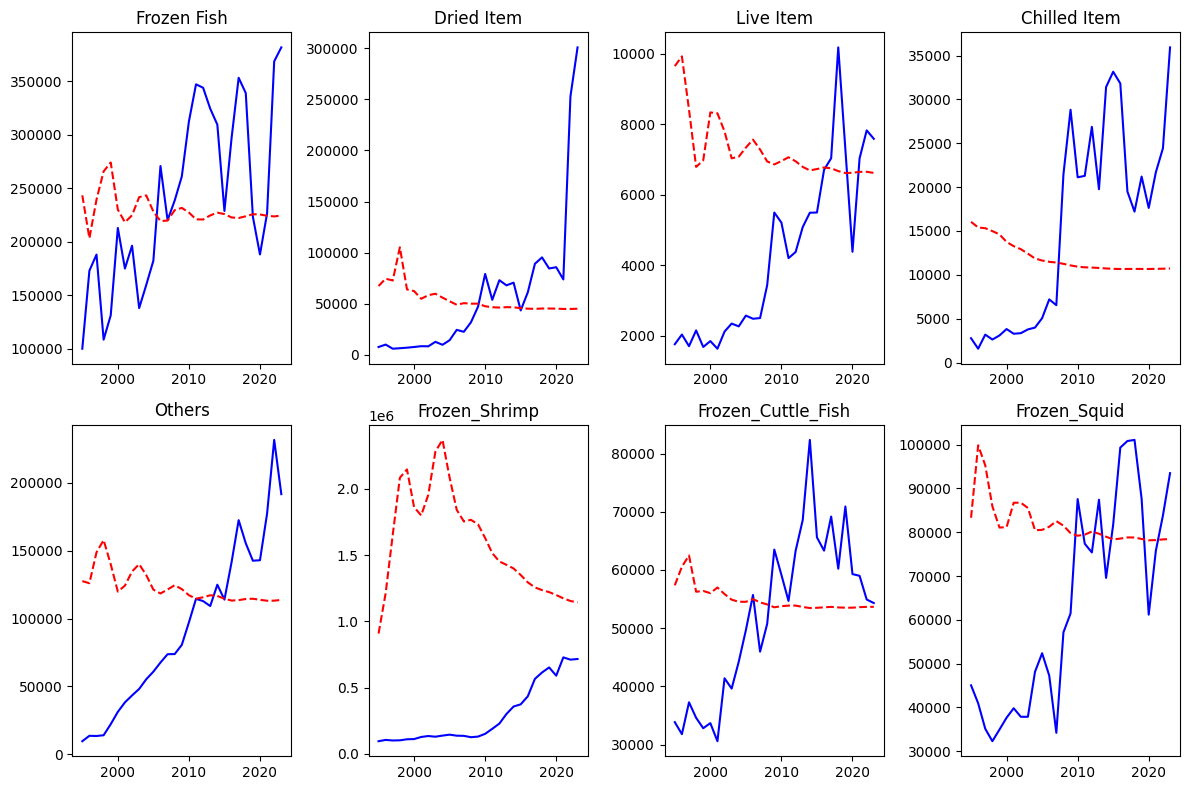

In [48]:
train=df[['Frozen_Fish_Inv', 'Dried_Item_Inv', 'Live_Item_Inv',
       'Chilled_Item_Inv', 'Others_Inv', 'Frozen_Shrimp_Inv',
       'Frozen_Cuttle_Fish_Inv', 'Frozen_Squid_Inv']]

test=df[['Frozen_Fish_Inv', 'Dried_Item_Inv', 'Live_Item_Inv',
       'Chilled_Item_Inv', 'Others_Inv', 'Frozen_Shrimp_Inv',
       'Frozen_Cuttle_Fish_Inv', 'Frozen_Squid_Inv']]
scaler = StandardScaler()
train_scaled = pd.DataFrame(scaler.fit_transform(train), columns=train.columns, index=train.index)
lag_order=2
model = VAR(train_scaled)
results=model.fit(maxlags=lag_order,method='ols')
forecast_scaled = results.forecast(train_scaled.values[-lag_order:], steps=len(test))
forecast = scaler.inverse_transform(forecast_scaled)
forecast_data = pd.DataFrame(forecast, index=test.index, columns=train.columns)
test=1/test
forecast_data=1/forecast_data
from sklearn.metrics import mean_squared_error
print("Total RMSE {}".format(np.sqrt(mean_squared_error(test,forecast_data))))
print("Frozen Fish RMSE:", np.sqrt(mean_squared_error(test['Frozen_Fish_Inv'], forecast_data['Frozen_Fish_Inv'])))
print("Dried Item RMSE:", np.sqrt(mean_squared_error(test['Dried_Item_Inv'], forecast_data['Dried_Item_Inv'])))
print("Live Item RMSE:", np.sqrt(mean_squared_error(test['Live_Item_Inv'], forecast_data['Live_Item_Inv'])))
print("Chilled Item RMSE:", np.sqrt(mean_squared_error(test['Chilled_Item_Inv'], forecast_data['Chilled_Item_Inv'])))
print("Others RMSE:", np.sqrt(mean_squared_error(test['Others_Inv'], forecast_data['Others_Inv'])))
print(results.summary())
plot_series(test,forecast_data)
with open('model.pkl','wb') as file:
  pickle.dump(results,file)


**Function to be used for Deployment**

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
import pickle
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [50]:
def predict(x,item):
  train_data={
      'Frozen_Fish':[100093, 173005, 188029, 108556, 131304, 212903, 174976, 196322, 138023, 159689, 182344, 270751, 220200, 238544, 260979, 312358, 347118, 343876, 324359, 309434, 228749, 296762, 353192, 338933, 223318, 188130, 226586, 368549, 381588],
      'Dried_Item':[7506, 9893, 5840, 6320, 6853, 7532, 8307, 8178, 12574, 9692, 14167, 24293, 22414, 31688, 47053, 79059, 53721, 72953, 67901, 70544, 43320, 61071, 88997, 95296, 84417, 85661, 73679, 252918, 300966],
      'Live_Item':[1756, 2030, 1700, 2148, 1678, 1844, 1628, 2115, 2341, 2262, 2568, 2478, 2498, 3434, 5492, 5208, 4199, 4373, 5080, 5488, 5493, 6703, 7034, 10179, 7287, 4379, 7032, 7824, 7585],
      'Chilled_Item':[2773, 1578, 3183, 2624, 3088, 3820, 3284, 3350, 3779, 3988, 5060, 7200, 6541, 21453, 28817, 21118, 21278, 26868, 19755, 31404, 33150, 31815, 19501, 17207, 21202, 17622, 21689, 24428, 35925],
      'Others':[9555, 13563, 13395, 13960, 22116, 31195, 38209, 43299, 48090, 55250, 60841, 67571, 73698, 73801, 80592, 97145, 114538, 112841, 109212, 124947, 113949, 141442, 172512, 155487, 142638, 142975, 177414, 231703, 191709],
      'Frozen_Shrimp':[95724,105427,101318,102484,110275,111874,127709,134815,129768,138085,145180,137397,136223,126039,130553,151465,189125,228620,301435,357505,373866,434486,565980,614145,652253,590275,728123,711099,716004],
      'Frozen_Cuttle_Fish':[33845,31778,37258,34589,32799,33677,30568,41381,39610,44239,49651,55701,45955,50750,63504,59159,54671,63296,68577,82353,65596,63320,69183,60210,70906,59292,58992,54919,54316],
      'Frozen_Squid':[45025,40924,35095,32254,34918,37628,39790,37838,37832,48124,52352,47252,34172,57125,61445,87579,77373,75387,87437,69569,81769,99348,100845,101101,87631,61176,75750,83846,93509]
      }
  train_data=pd.DataFrame(train_data)
  scaler=StandardScaler()
  train_scaled = pd.DataFrame(scaler.fit_transform(1/train_data),
                                columns=train_data.columns,
                                index=train_data.index)
  if(x<2025 or x>2030):
    return " Please enter the year within the range 2025-2030"
  with open('model.pkl','rb') as file:
    model=pickle.load(file)
  steps=x-2023
  lag_order = model.k_ar
  forecast_scaled = model.forecast(train_scaled.values[-lag_order:], steps=steps)
  forecast = scaler.inverse_transform(forecast_scaled)
  forecast_data = pd.DataFrame(forecast, columns=train_data.columns)
  forecast_data = 1/forecast_data
  if(item=="Frozen Fish"):
    item="Frozen_Fish"
  elif(item=="Dried Item"):
    item="Dried_Item"
  elif(item=="Live Item"):
    item="Live_Item"
  elif(item=="Chilled Item"):
    item="Chilled_Item"
  elif(item=="Others"):
    item="Others"
  else:
    return "Not a Fish. Please provide another input."
  item_data=forecast_data[item]
  forecast_years=[]
  for i in range(len(item_data)):
    print("Year {} Prediction {}".format(2024+i,item_data[i]))
    forecast_years.append(2023+i+1)
  years=np.arange(1995,2024)
  plt.figure(figsize=(10,6))

  plt.plot(years,train_data[item],marker="o",linestyle="--",label="Trend from 1995 to 2023")
  plt.plot(forecast_years,item_data.values,linestyle="-",label="Forecast value from 2024 till {}".format(x))
  plt.legend()
  plt.xlabel("Years")
  plt.ylabel("Export Quantity in Metric Tons")
  plt.title("Forecast of Export Quantity from 2024 till {}".format(x))



Enter a year in the range 2025-2030:2029
Enter an item:Chilled Item
Year 2024 Prediction 16040.072888133478
Year 2025 Prediction 15399.463373466686
Year 2026 Prediction 15313.637594902693
Year 2027 Prediction 14986.151799494151
Year 2028 Prediction 14611.573638975833
Year 2029 Prediction 13750.661301612623


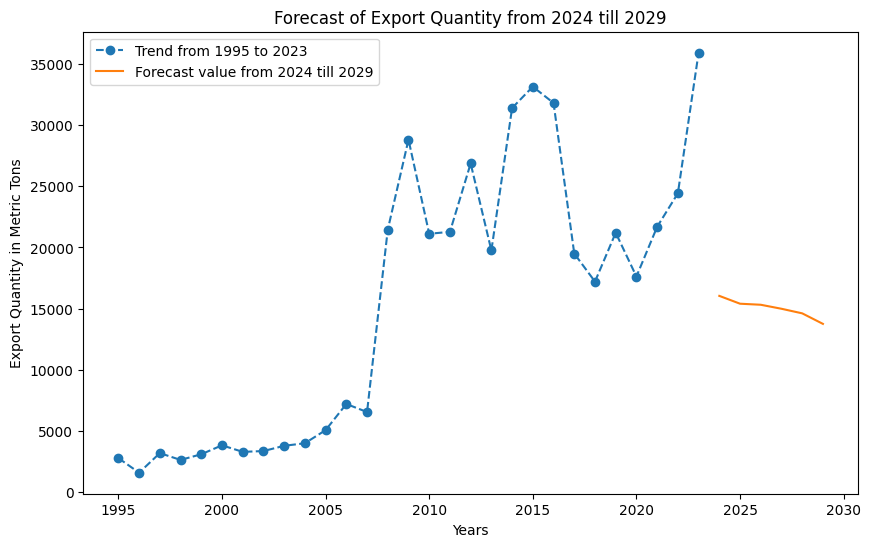

In [51]:
 x=int(input("Enter a year in the range 2025-2030:"))
 item=input("Enter an item:")
 predict(x,item)

Enter a year in the range 2025-2030:2026
Enter an item:Frozen Fish
Year 2024 Prediction 243398.628929609
Year 2025 Prediction 203259.37958642707
Year 2026 Prediction 239414.88983708367


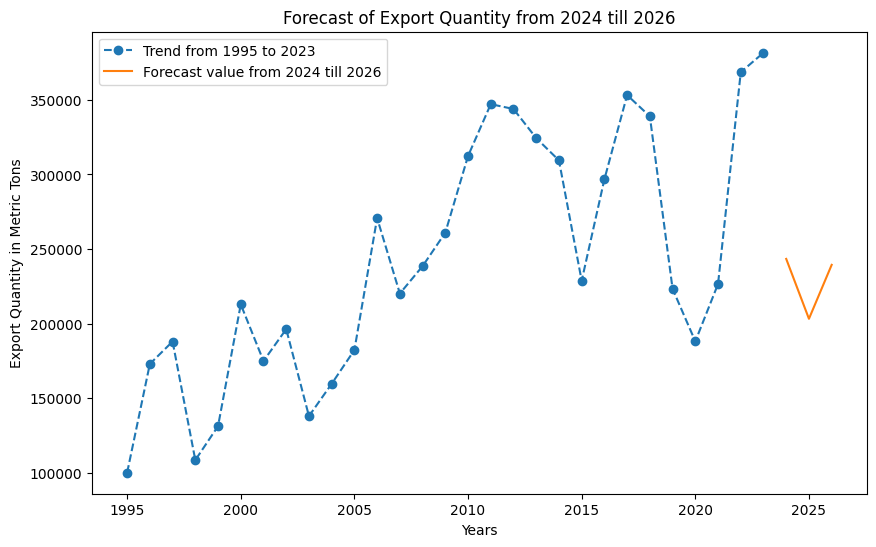

In [52]:
 x=int(input("Enter a year in the range 2025-2030:"))
 item=input("Enter an item:")
 predict(x,item)

In [53]:
 x=int(input("Enter a year in the range 2025-2030:"))
 item=input("Enter an item:")
 predict(x,item)

Enter a year in the range 2025-2030:2028
Enter an item:Cuttle Fish


'Not a Fish. Please provide another input.'